# Exploratory Data Analysis
                                                                                                                 

#  web scraping 

> importing all the required python modulus 

In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Code for extracting data from website by using web scraping techiques

In [5]:
doctor = []
area = []
cities = []
specialization = []
fees = []
rating = []
experience = []
hospitalname = []
stories = []
city = ["Delhi","Bangalore","Hyderabad","kolkata","Mumbai"]
spec = ["Dermatologist","Dentist","Homoeopath"]
for j in city:
    for k in spec:
        for i in range(1,10):
            url=f"https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22{k}%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={j}&page={i}"
            page=requests.get(url)
    
            soup=BeautifulSoup(page.text)
    
            for i in soup.find_all("div",class_="listing-doctor-card"):
                doc = i.find("div",class_='u-color--primary uv2-spacer--xs-bottom').text
                if doc:
                    doctor.append(doc)
                else:
                    doctor.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                are = i.find("div",class_="u-bold u-d-inlineblock u-valign--middle").text
                if are:
                    regex = re.findall("(.+),",are)
                    if regex:
                        area.append(regex[0])
                else:
                    area.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                cit = i.find("div",class_="u-bold u-d-inlineblock u-valign--middle").text
                if cit:
                    regex = re.findall(",(.+)",cit)
                    if regex:
                        cities.append(regex[0])
                else:
                    cities.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                desig = i.find("div",class_='u-grey_3-text').text
                if desig:
                    regex = re.findall("Dentist|Dermatologist|Homoeopath",desig)
                if regex:
                    specialization.append(regex[0])
                else:
                    specialization.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                fee = i.find("div",class_="uv2-spacer--sm-top").text
                if fee:
                    regex = re.findall("₹(\d+)",fee)
                if regex:
                    fees.append(regex[0])
                else:
                    fees.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                rate = i.find("div",class_="uv2-spacer--md-top uv2-cushion--lg-top u-border-general-dashed-top--gray-10").text
                if rate:
                    regex = re.findall("(.+)%",rate)
                    if regex:
                        rating.append(regex[0])
                else:
                    rating.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                expe =i.find("div",class_="uv2-spacer--xs-top").text
                if expe:
                    regex = re.findall("(\d+)\syears",expe)
                if regex:
                    experience.append(regex[0])
                else:
                    experience.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                hn = i.find("span",class_="u-c-pointer u-t-hover-underline").text
                if hn:
                    hospitalname.append(hn)
                else:
                    hospitalname.append(np.nan)
            for i in soup.find_all("div",class_="listing-doctor-card"):
                stor = i.find("div",class_="uv2-spacer--md-top uv2-cushion--lg-top u-border-general-dashed-top--gray-10").text
                if stor:
                    regex = re.findall("(\d+)\sP",stor)
                if regex:
                    stories.append(regex[0])
                else:
                    stories.append(np.nan)
            

* check for  all the list has same length so that the dataframe can be formed .

In [6]:
len(specialization)

1081

In [8]:
len(doctor)

1081

In [9]:
len(area)

1081

In [10]:
len(cities)

1081

In [11]:
len(fees)

1081

In [12]:
len(rating)

1081

In [14]:
len(experience)

1081

In [16]:
len(hospitalname)

1081

In [17]:
len(stories)

1081

* all the lists has the same length so we can form the dataframe using them

> forming a dataframe by using extracted data -

In [18]:
dentist = {"name":doctor,"area":area,"city":cities,"specialization":specialization,"consultationfee":fees,"rating":rating,"experience":experience,"hospitalname":hospitalname,"stories":stories}

In [19]:
df = pd.DataFrame(dentist)

In [7]:
df

,Unnamed: 0,name,area,city,specialization,consultationfee,rating,experience,hospitalname,stories
0,0,Dr. Hemant Sharma,Pusa Road,Delhi,Dermatologist,1500.0,96.0,48.0,BLK-Max Super Speciality Hospital,46.0
1,1,Dr. Sirisha Singh,Greater Kailash Part 1,Delhi,Dermatologist,1500.0,97.0,29.0,SCI International Hospital,101.0
2,2,Dr. Tanvi Pal,Pusa Road,Delhi,Dermatologist,1500.0,97.0,19.0,BLK-Max Super Speciality Hospital,26.0
3,3,Dr. Pallav S Kishanpuria,Pusa Road,Delhi,Dermatologist,1500.0,93.0,19.0,BLK-Max Super Speciality Hospital,32.0
4,4,Dr. A J Kanwar,Greater Kailash Part 1,Delhi,Dermatologist,1500.0,96.0,52.0,Dr AJ Kanwar Skin Clinic,398.0
...,...,...,...,...,...,...,...,...,...,...
1076,1076,Dr. Trupti Kadam,Borivali West,Mumbai,Homoeopath,450.0,NaN,13.0,Dr Batra's Positive Health Clinic Pvt Ltd,29.0
1077,1077,Dr. Sushil Jain,Parel,Mumbai,Homoeopath,450.0,NaN,6.0,Jain Clinic,29.0
1078,1078,Dr. Sultanali Shaikh,Girgaon,Mumbai,Homoeopath,450.0,NaN,8.0,Dr Batra's Positive Health Clinic Pvt Ltd,29.0
1079,1079,Dr. Varsha Suryawanshi,Mulund West,Mumbai,Homoeopath,500.0,NaN,11.0,Lifeforce Homeopathy Clinic,29.0


* Exporting the data frame into .csv format

In [ ]:
df.to_csv("DoctorConsutation.csv")

In [3]:
df = pd.read_csv("DoctorConsutation.csv")

In [4]:
df

,Unnamed: 0,name,area,city,specialization,consultationfee,rating,experience,hospitalname,stories
0,0,Dr. Hemant Sharma,Pusa Road,Delhi,Dermatologist,1500.0,96.0,48.0,BLK-Max Super Speciality Hospital,46.0
1,1,Dr. Sirisha Singh,Greater Kailash Part 1,Delhi,Dermatologist,1500.0,97.0,29.0,SCI International Hospital,101.0
2,2,Dr. Tanvi Pal,Pusa Road,Delhi,Dermatologist,1500.0,97.0,19.0,BLK-Max Super Speciality Hospital,26.0
3,3,Dr. Pallav S Kishanpuria,Pusa Road,Delhi,Dermatologist,1500.0,93.0,19.0,BLK-Max Super Speciality Hospital,32.0
4,4,Dr. A J Kanwar,Greater Kailash Part 1,Delhi,Dermatologist,1500.0,96.0,52.0,Dr AJ Kanwar Skin Clinic,398.0
...,...,...,...,...,...,...,...,...,...,...
1076,1076,Dr. Trupti Kadam,Borivali West,Mumbai,Homoeopath,450.0,NaN,13.0,Dr Batra's Positive Health Clinic Pvt Ltd,29.0
1077,1077,Dr. Sushil Jain,Parel,Mumbai,Homoeopath,450.0,NaN,6.0,Jain Clinic,29.0
1078,1078,Dr. Sultanali Shaikh,Girgaon,Mumbai,Homoeopath,450.0,NaN,8.0,Dr Batra's Positive Health Clinic Pvt Ltd,29.0
1079,1079,Dr. Varsha Suryawanshi,Mulund West,Mumbai,Homoeopath,500.0,NaN,11.0,Lifeforce Homeopathy Clinic,29.0


# Data Cleaning -

* checking for null values -

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1081 non-null   int64  
 1   name             1081 non-null   object 
 2   area             1081 non-null   object 
 3   city             1081 non-null   object 
 4   specialization   1081 non-null   object 
 5   consultationfee  1077 non-null   float64
 6   rating           999 non-null    float64
 7   experience       1080 non-null   float64
 8   hospitalname     1081 non-null   object 
 9   stories          1062 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 84.6+ KB


* the null values are present  in the some  columns  consultation fee, rating,
experience and stories .


> the null values consulation fee column has replaced by using group by of specialization  because the consultation fee will be different for different specialization

In [163]:
df.groupby(by=["specialization"])["consultationfee"].median()

specialization
Dentist          500.0
Dermatologist    800.0
Homoeopath       500.0
Name: consultationfee, dtype: float64

In [5]:
def fill_null_with_group_median(group):
    return group.fillna(group.median())

In [6]:
df["consultationfee"]=df.groupby(by=["specialization"])["consultationfee"].transform(fill_null_with_group_median)

In [7]:
df["consultationfee"]

0       1500.0
1       1500.0
2       1500.0
3       1500.0
4       1500.0
         ...  
1076     450.0
1077     450.0
1078     450.0
1079     500.0
1080     450.0
Name: consultationfee, Length: 1081, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1081 non-null   int64  
 1   name             1081 non-null   object 
 2   area             1081 non-null   object 
 3   city             1081 non-null   object 
 4   specialization   1081 non-null   object 
 5   consultationfee  1081 non-null   float64
 6   rating           999 non-null    float64
 7   experience       1080 non-null   float64
 8   hospitalname     1081 non-null   object 
 9   stories          1062 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 84.6+ KB


> The null values in rating has filled with median of that column because the rating is Depends on his treatment it does not have relation with other columns and are filled with median because outliers are present in the rating column

In [170]:
df["rating"].median()

98.0

In [9]:
df["rating"]=df["rating"].fillna(df["rating"].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1081 non-null   int64  
 1   name             1081 non-null   object 
 2   area             1081 non-null   object 
 3   city             1081 non-null   object 
 4   specialization   1081 non-null   object 
 5   consultationfee  1081 non-null   float64
 6   rating           1081 non-null   float64
 7   experience       1080 non-null   float64
 8   hospitalname     1081 non-null   object 
 9   stories          1062 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 84.6+ KB


> also the Experience null values replaced with median of that column 

In [174]:
df.groupby("stories")["experience"].median()

stories
1.0       15.0
2.0       12.0
3.0       15.0
4.0       15.5
5.0       18.0
          ... 
1324.0    20.0
1426.0    17.0
1991.0    13.0
2757.0    18.0
3525.0    30.0
Name: experience, Length: 309, dtype: float64

In [175]:
df['experience'].unique()

array([48., 29., 19., 52., 28., 26., 21., 13., 23., 25., 18., 20., 12.,
       10., 16., 14.,  8., 15.,  6.,  5., 38.,  9., 37.,  7., 11., 22.,
        4.,  3., 36., 35., 44., 53., 33., 40., 27., 17., 41., 46., 24.,
       32., 34., 51., 30., 39.,  2., 45., 31., 42., 49., 43., 54.])

In [11]:
df["experience"]=df["experience"].fillna(df["experience"].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1081 non-null   int64  
 1   name             1081 non-null   object 
 2   area             1081 non-null   object 
 3   city             1081 non-null   object 
 4   specialization   1081 non-null   object 
 5   consultationfee  1081 non-null   float64
 6   rating           1081 non-null   float64
 7   experience       1081 non-null   float64
 8   hospitalname     1081 non-null   object 
 9   stories          1062 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 84.6+ KB


> the stories null values replaced by using group by of the experience column because the stories increases No of years of experience

In [179]:
df["stories"]=df.groupby(by=["specialization"])["stories"].transform(fill_null_with_group_median)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1081 non-null   object 
 1   area             1081 non-null   object 
 2   city             1081 non-null   object 
 3   specialization   1081 non-null   object 
 4   consultationfee  1081 non-null   float64
 5   rating           1081 non-null   float64
 6   experience       1081 non-null   float64
 7   hospitalname     1081 non-null   object 
 8   stories          1081 non-null   float64
dtypes: float64(4), object(5)
memory usage: 76.1+ KB


# checking for duplicate values -

In [14]:
df.duplicated().sum()

0

*  duplicate rows are not present in the dataframe

# uni-variate analysis

### analysis on city -

<Axes: ylabel='city'>

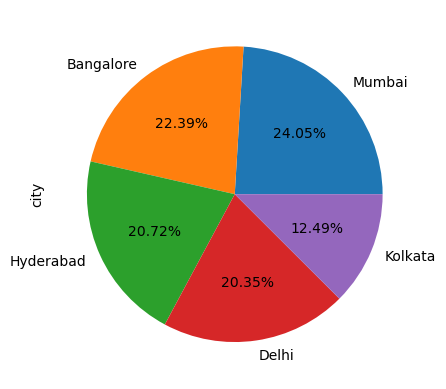

In [181]:
df['city'].value_counts().plot.pie(autopct="%.2f%%")

* from the above pieplot it is observed that there are less no.of doctors present in kolkata i.e 12% whereas the highest no.of doctors are from mumbai

### Analysis on specialization -

<Axes: xlabel='specialization', ylabel='count'>

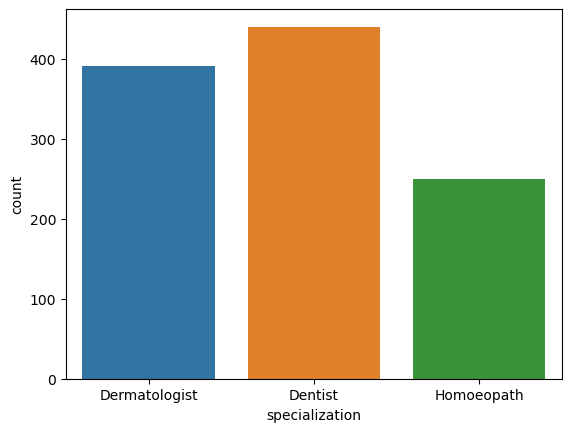

In [182]:
sns.countplot(x="specialization",data=df)

* from above graph we can see that  there are more no.of dentist present whwn compared to dermatatologist and homoeopath 

### Analysis on ratings -

<Axes: xlabel='rating', ylabel='Count'>

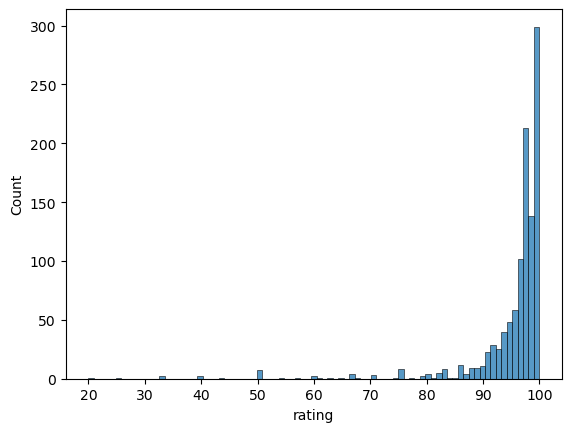

In [184]:
sns.histplot(data=df,x="rating")

* the above  histogram  shows that most of the ratings are between 80 to 100

# analysis on stories -

<Axes: ylabel='stories'>

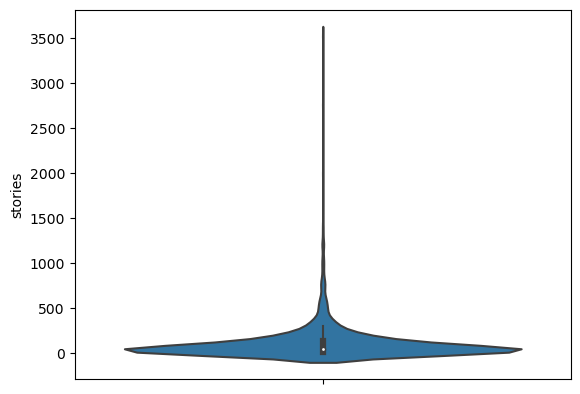

In [185]:
sns.violinplot(y='stories', data=df)

* outliers are present in stories and most of the stories are between 0 to 500

### Analysis on experience -

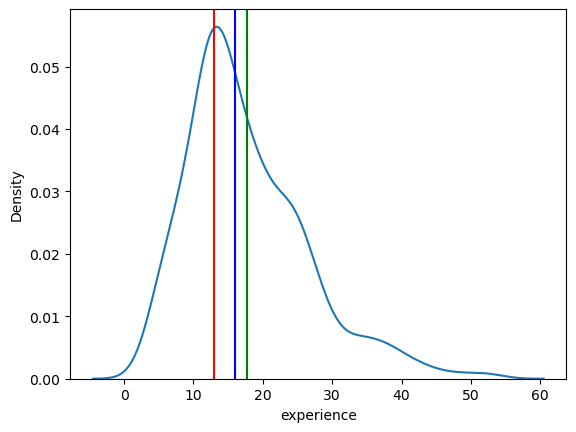

In [186]:
x = df["experience"].mode()[0]
y = df["experience"].median()
z = df["experience"].mean()
sns.kdeplot(df["experience"])
plt.axvline(x,color="red")#mode
plt.axvline(y,color="blue") #median
plt.axvline(z,color="green")

* Kde plot shows that more experiences are between 5 and 20 years the kde plot is positively skewed as the mean(green line) is higher than the mode(redline)

# bi-variate analysis -

### Analysis on cities & experience -

<Axes: xlabel='city', ylabel='experience'>

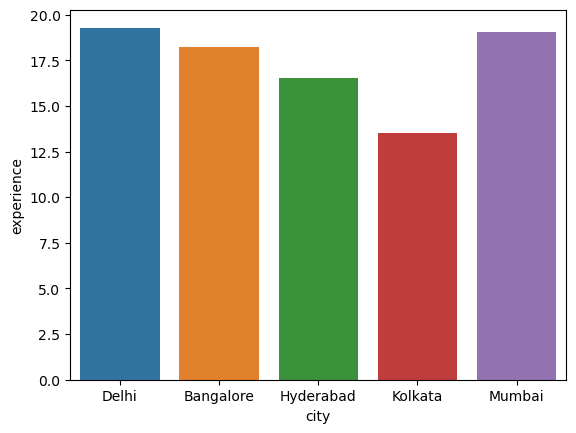

In [193]:
sns.barplot(data=df,x="city",y = "experience",errorbar = None)

* Bar plot between city and experience shows that the less experienced doctors are from Kolkata compared to other cities


### Analysis on specialization and stories-

<Axes: xlabel='specialization', ylabel='stories'>

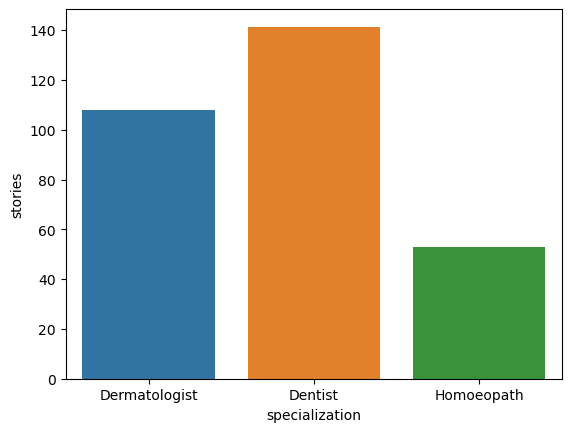

In [195]:
sns.barplot(data=df,x="specialization",y = "stories",errorbar = None)

* The barplot between specialization and stories shows that more no.of pateients are visiting dentist in comparsion with others

### analysis on experience and consultation fees -

<Axes: xlabel='experience', ylabel='consultationfee'>

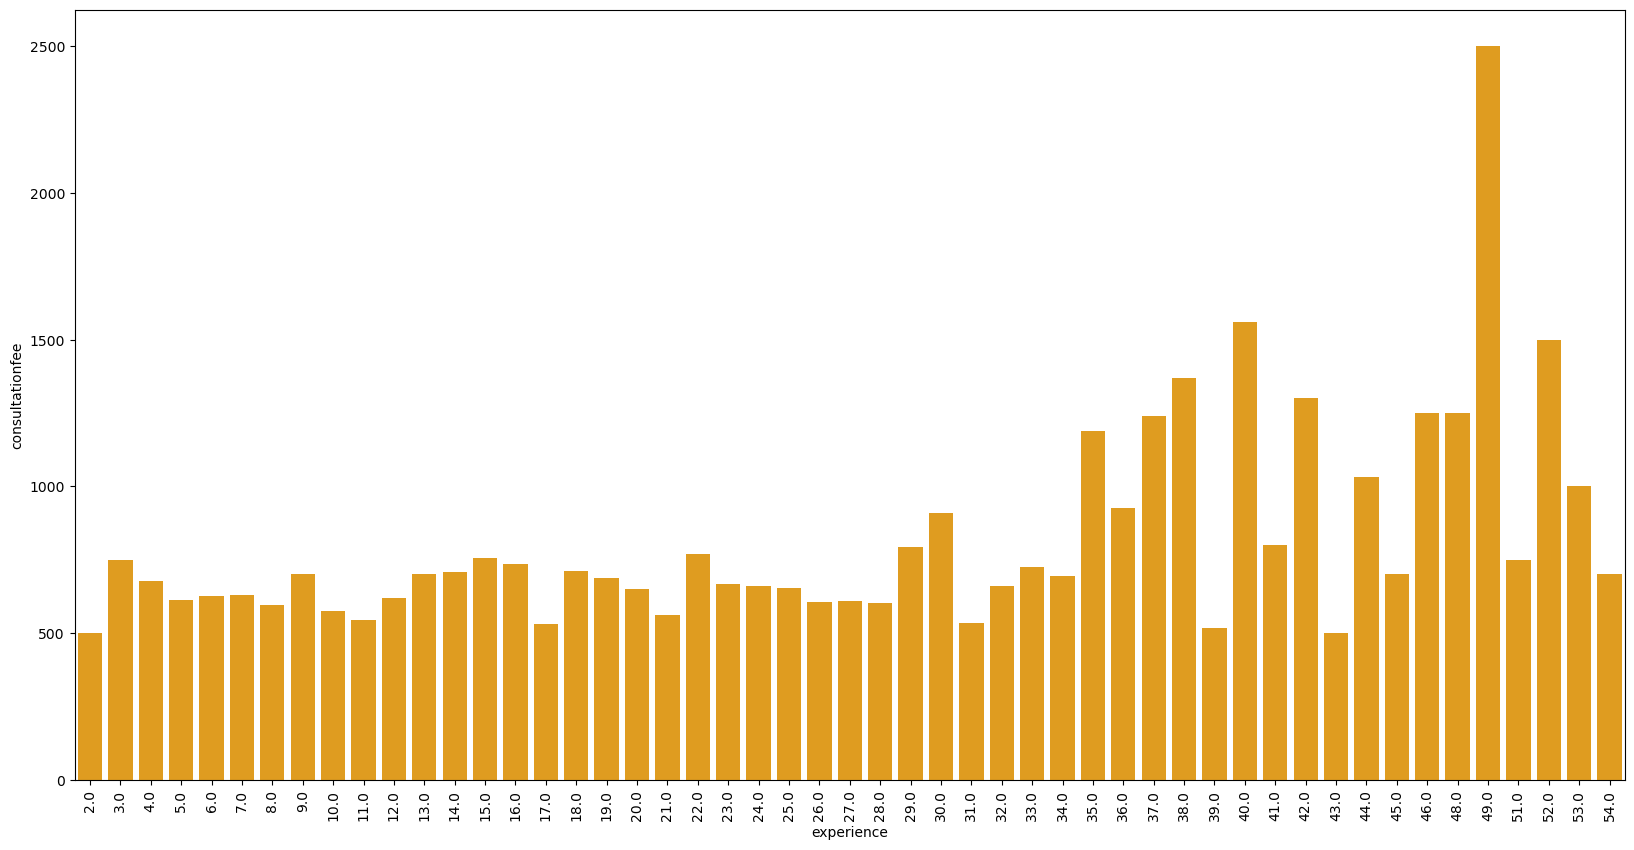

In [222]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(data=df,x="experience",y = "consultationfee",errorbar = None,color = "orange")

* doctor with 49 years experience has more consultation fee

### Analysis on cities and consultation fee-

<Axes: xlabel='city', ylabel='consultationfee'>

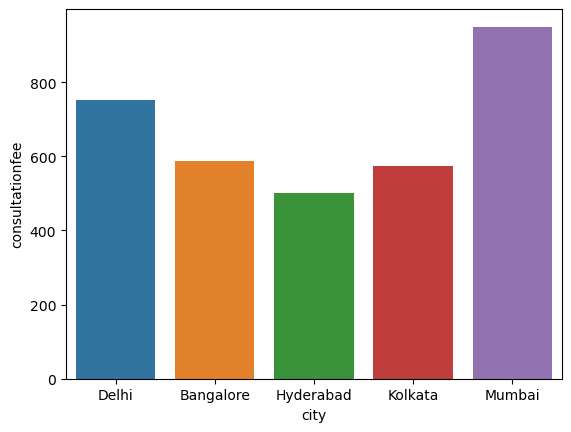

In [199]:
sns.barplot(data=df, x= 'city',y= 'consultationfee',errorbar = None)

* Above barplot shows Mumbai has the highest consultationfee.

### Analysis on specialization & consultation fee -

<Axes: xlabel='specialization', ylabel='consultationfee'>

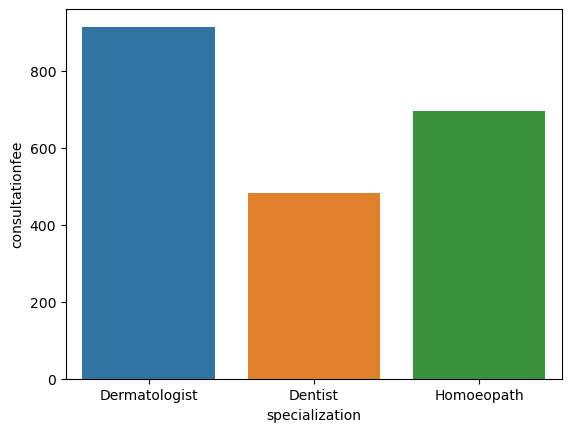

In [201]:
sns.barplot(data=df,x ="specialization",y="consultationfee",errorbar= None)

* Bar plot shows that dermatologist charges more consultation fee and dentists charges low.

### Analysis on rating and consultation fee-

<Axes: xlabel='rating', ylabel='consultationfee'>

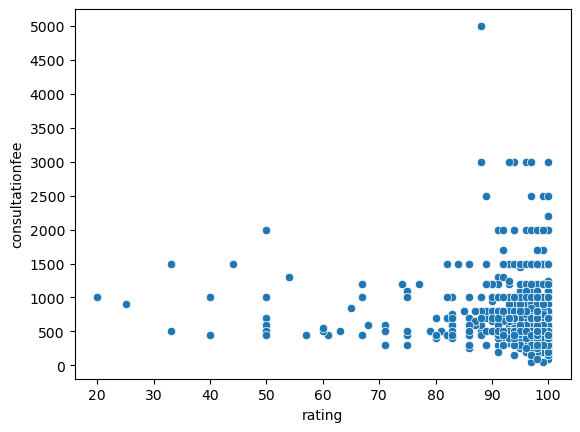

In [283]:
plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
sns.scatterplot(data=df,x ="rating",y="consultationfee")

*  the scatterplot between rating and  consultation fee it is clear that the most of  high rated doctor’s consultation fee is below 1500

### analysis on stories and experience and stories -

<Axes: xlabel='experience', ylabel='stories'>

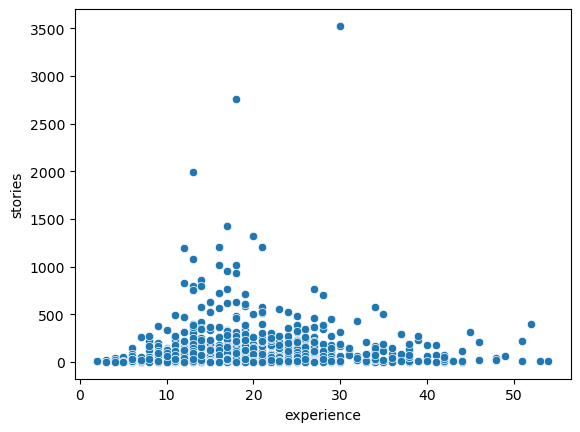

In [207]:
sns.scatterplot(data=df,x ="experience",y="stories")

* mostof the doctors has stories lessthan 500.

### Analysis on specializations and cities-

<Axes: xlabel='specialization', ylabel='city'>

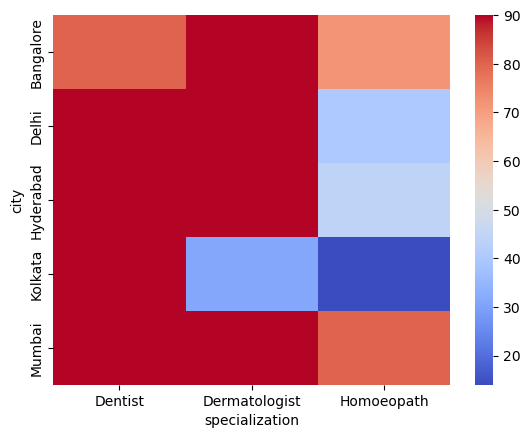

In [9]:
sns.heatmap(pd.crosstab(df['city'],df['specialization']),cmap='coolwarm')

* In Heat plot between specialization and city shows dentist, dermatologist  are present in all the cities except dentist in bangalore and dermatologist in Kolkata homoeopath doctors are less I all the cities but they are low in Kolkata 

# multi-variate analysis -

### analysis on city,consultation fee, specializations -

<Axes: xlabel='city', ylabel='consultationfee'>

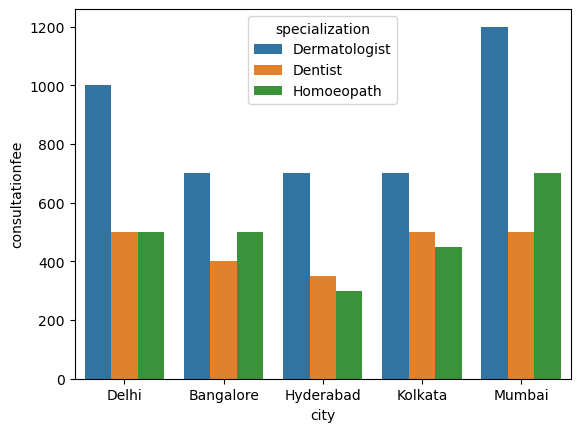

In [297]:
sns.barplot(data=df,x ="city",y="consultationfee",hue = "specialization",estimator='median',errorbar = None)

* in all the cities consultation fee is high for dermatologists

### Analysis on city,specialization and consultation fee-

<Axes: xlabel='city,specialization'>

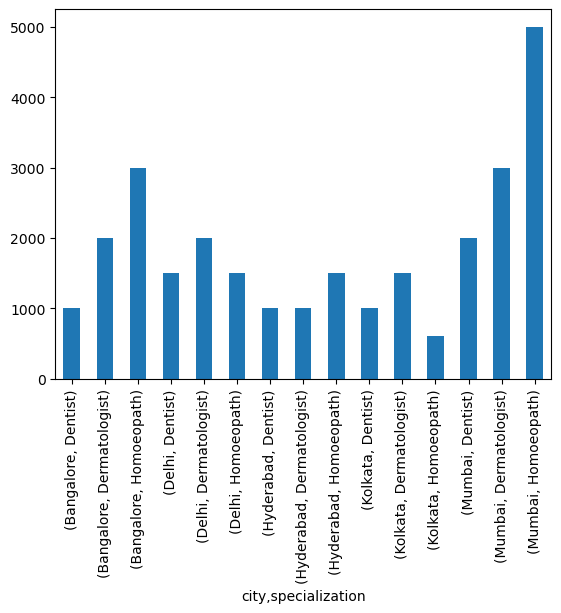

In [247]:
a = df.groupby(["city","specialization"])["consultationfee"].max()
a.plot(kind = "bar")

* From the above bar plot it shows that homoeopath from Mumbai charges high consultation fee

### Analysis on rating ,specialization and consultation fee-

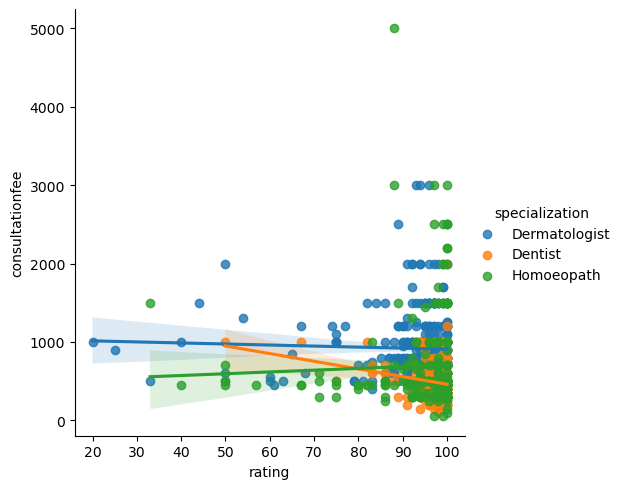

In [277]:
sns.lmplot(x="rating", y="consultationfee", hue="specialization", data=df)

* Above plot shows that consultation fee decrease with increase in rating for dentist and increases for homoeopath and remains constants for dermatologist

### Analysis on rating ,consultation fee and city-

<Axes: xlabel='rating', ylabel='consultationfee'>

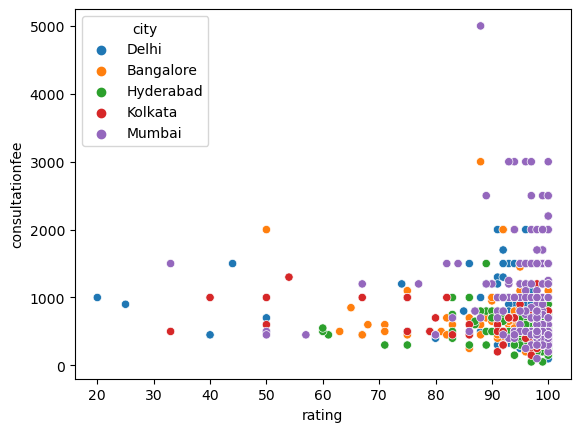

In [289]:
sns.scatterplot(data=df,x ="rating",y="consultationfee",hue = "city")

* Scatterplot shows that high rated doctors are from Mumbai

### Analysis on cities, specializations and stories-

Text(0, 0.5, 'stories')

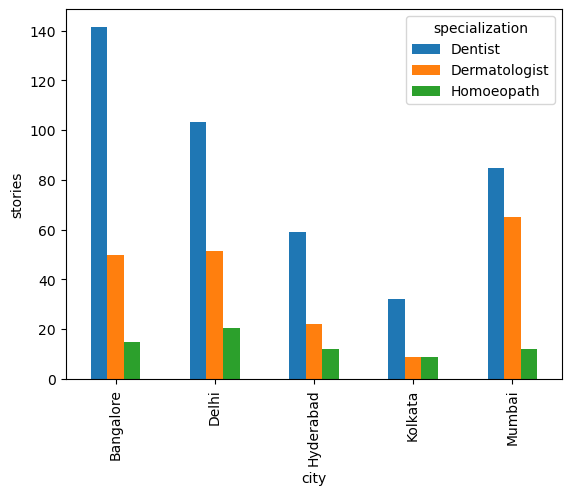

In [12]:
a=pd.crosstab(df.city,df.specialization,values=df.stories,aggfunc="median")
a.plot(kind = "bar")
plt.ylabel('stories')

* The above plot shows that people visits dentists more than dermatologist and homeopath

### Analysis correlation between numerical columns -

<Axes: >

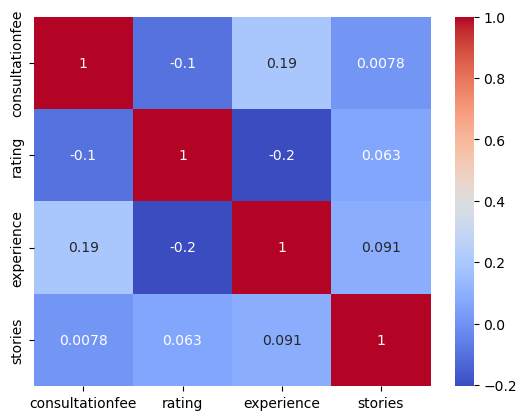

In [320]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

* The heatmap shows the there is a weak negative correlation between rating and experience.